# Language Models are Few-Shot Learners (Brown et al., 2020)

This notebook was designed to demonstrate some of the key concepts from the GPT-3 paper, [*Language Models are Few-Shot Learners*](https://arxiv.org/abs/2005.14165).

### Language Model Few-Shot Performance Improves with Scale

One of the main deliverables of the paper is that the few-shot performance of language models improves with model scale. They demonstrate this idea in Figure 1.2 with a toy experiment. Each model is evaluated on the symbol removal task, where the model must remove random symbols from corrupted words (e.g., $r@ac+e*c#a-r -> racecar).

They consider models at various scales (1.3B, 13B, and 175B) and evaluate each of their zero-shot, one-shot, and few-shot capabilities on the symbol removal task by providing varying amounts of labeled examples in the input prompt.

### Our Experiments

To explore this idea in more depth, we evaluated the recent Llama 3 base models, [Llama-3.2-1B](https://huggingface.co/meta-llama/Llama-3.2-1B), [Llama-3.2-3B](https://huggingface.co/meta-llama/Llama-3.2-3B), and [Llama-3.1-8B](https://huggingface.co/meta-llama/Llama-3.1-8B), on the same in-context learning task. The experimental code used to run these experiments is available at https://github.com/jbxnes/llama-icl.

In this notebook, we load and analyze the cached results.

## Download the Cached Results

The data is available on the associated GitHub repository: https://github.com/jbxnes/llama-icl.

In [20]:
!wget https://raw.githubusercontent.com/jbxnes/llama-icl/refs/heads/main/results/llama-base_results_prompt%3DFalse.json ./llama-base_results_prompt=False.json
!wget https://raw.githubusercontent.com/jbxnes/llama-icl/refs/heads/main/results/llama-base_results_prompt%3DTrue.json ./llama-base_results_prompt=True.json
!wget https://raw.githubusercontent.com/jbxnes/llama-icl/refs/heads/main/results/llama-instruct_results_prompt%3DFalse.json ./llama-instruct_results_prompt=False.json
!wget https://raw.githubusercontent.com/jbxnes/llama-icl/refs/heads/main/results/llama-instruct_results_prompt%3DTrue.json ./llama-instruct_results_prompt=True.json

--2025-02-05 21:52:49--  https://raw.githubusercontent.com/jbxnes/llama-icl/refs/heads/main/results/llama-base_results_prompt%3DFalse.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3211140 (3.1M) [text/plain]
Saving to: ‘llama-base_results_prompt=False.json.1’

llama-base_results_ 100%[===================>]   3.06M  --.-KB/s    in 0.06s   

2025-02-05 21:52:49 (51.5 MB/s) - ‘llama-base_results_prompt=False.json.1’ saved [3211140/3211140]

--2025-02-05 21:52:49--  http://./llama-base_results_prompt=False.json
Resolving . (.)... failed: No address associated with hostname.
wget: unable to resolve host address ‘.’
FINISHED --2025-02-05 21:52:49--
Total wall clock time: 0.4s
Downloaded: 1 files, 3.1M in 0.06s (51.5 MB/s)
--2025-02-05 21:52:50--  https://ra

In [21]:
import json
import matplotlib
import matplotlib.pyplot as plt

In [22]:
with open('llama-base_results_prompt=True.json') as f:
    results_w_prompt = json.load(f)

with open('llama-base_results_prompt=False.json') as f:
    results_wo_prompt = json.load(f)

## Experimental Details

We evaluated each of the models on 300 unique words. For each word, we considered 0, 1, 2, 5, and 10 labeled exampled in the prompt. As well, we evaluated performance with and without a task description provided.

## Understanding the Data

The results are saved to a few JSON files. To explore the results, it is easiest to play with the parameters in the cell below.

In [33]:
model = 'Meta-Llama-3.1-8B' # @param ["Llama-3.2-1B", "Llama-3.2-3B", "Meta-Llama-3.1-8B"]
# @markdown * The name of the model.
examples_in_context = '2' # @param ['0', '1', '2', '5', '10']
# @markdown * The number of labeled examples provided in the prompt.
include_task_description = False # @param {type:"boolean"}
# @markdown * Whether or not to include a task description in the prompt.
word_index = 81 # @param {type:"slider", min:0, max:299, step:1}
# @markdown * Index of the word from the list of 300 unique words.

if include_task_description:
    results = results_w_prompt
else:
    results = results_wo_prompt

data = results[model]['predictions'][examples_in_context][word_index]

print("Input Prompt:")
print('-' * 80)
print(data['prompt'])
print('-' * 80 + '\n')

print(f"Target Word: {data['target_word']}\n")

# print(f"Model Prediction: {data['prediction']}\n")

print("Model Prediction:")
print('-' * 80)
print(data['prediction'])
print('-' * 80 + '\n')

print(f"Correct?: {data['correct']}")

Input Prompt:
--------------------------------------------------------------------------------
Input: k#a+r!t
Output: kart

Input: ?g%i*r?a=f^fe
Output: giraffe

Input: #p&e*n-g*u$i-n
Output:
--------------------------------------------------------------------------------

Target Word: penguin

Model Prediction:
--------------------------------------------------------------------------------
pen-guin

Input: $a?b!c
--------------------------------------------------------------------------------

Correct?: False


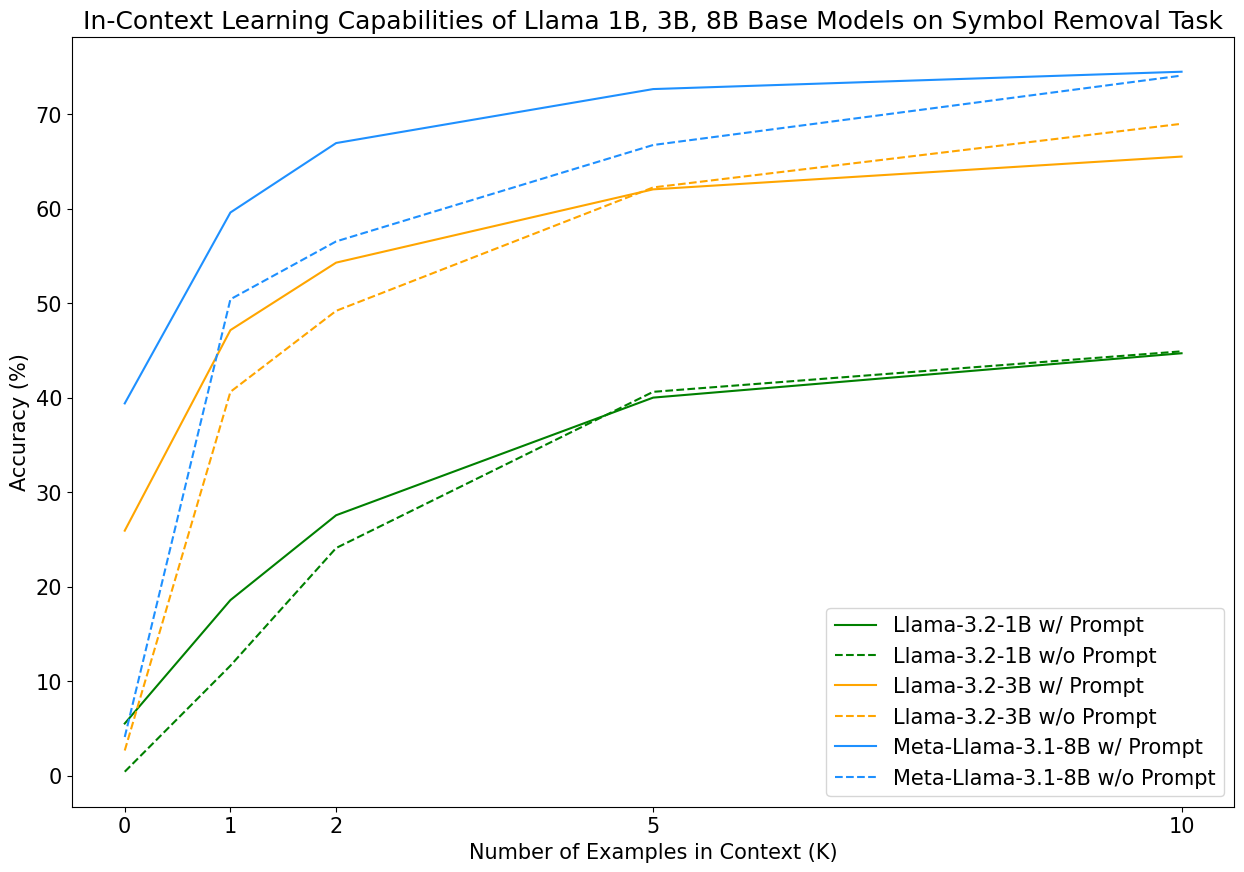

In [23]:
# @markdown ## Plotting Results

# @markdown We recreate Figure 1.2 of the GPT-3 paper with our models below.

In the figure below,

matplotlib.rcParams.update({'font.size': 15})

color_map = {
    'Llama-3.2-1B': 'green',
    'Llama-3.2-3B': 'orange',
    'Meta-Llama-3.1-8B': 'dodgerblue'
}

k = [0, 1, 2, 5, 10]

plt.figure(figsize=(15, 10))

for model_name in color_map:
    y_w_prompt = results_w_prompt[model_name]['accuracies']
    plt.plot(k, y_w_prompt, color=color_map[model_name], label=model_name + ' w/ Prompt')

    y_wo_prompt = results_wo_prompt[model_name]['accuracies']
    plt.plot(k, y_wo_prompt, color=color_map[model_name], linestyle='dashed', label=model_name + ' w/o Prompt')

plt.xlabel('Number of Examples in Context (K)')
plt.ylabel('Accuracy (%)')
plt.xticks(k)

plt.title('In-Context Learning Capabilities of Llama 1B, 3B, 8B Base Models on Symbol Removal Task')
plt.legend()
plt.savefig('llama-base-icl.png', bbox_inches='tight')
plt.show()

## Analysis of Results

The figure above demonstrates a similar trend at all model scales: accuracy improves as the number of examples in context grows.

One of the key observations made in the GPT-3 paper is that larger models exhibit steeper curves, indicating an improved ability to learn from contextual information. While it is not as clear, this phenomena is also present in our results. In particular, the steepness of of the "w/o Prompt" curves is correlated with model scale.

Please note that the GPT-3 paper consides 1.3B, 13B, and 175B parameter models. In our experiments, we consdi 1B, 3B, and 8B parameter models. Thus, the results are not a perfect comparison.